# Matrice projekcija

Sadržaj:

- [Definicija i osobine](#Definicija-i-osobine)
- [Izračunavanje matrica projekcije](#Izračunavanje-matrica-projekcije)

In [1]:
import numpy as np
from timeit import default_timer as timer
import numpy.random as rndm

## Definicija i osobine

Kvadratna matrica $P\in\mathcal{M}_{n\times n}$ za koju važi $P^2=P$ i $P=P^T$ zovemo ortogonalna projekcija, ili kraće projekcija. 

**Primer 1.** Матрица $P=\begin{bmatrix} 1&0\\0&0\end{bmatrix}$ је ортогонална пројекција.

In [2]:
P=np.array([[1,0],[0,0]])
P-P.T

array([[0, 0],
       [0, 0]])

In [3]:
P-P@P

array([[0, 0],
       [0, 0]])

**Задатак 1.** Испитати да ли је $P=\begin{bmatrix}1&a\\ 0&0\end{bmatrix}$ матрица пројекција. Да ли је $P$ ортогонална пројекција?

**Решење :**

$$P^2=\begin{bmatrix}1&a\\ 0&0\end{bmatrix}\begin{bmatrix}1&a\\ 0&0\end{bmatrix}=\begin{bmatrix}1&a\\ 0&0\end{bmatrix}=P.$$
Матрица $P$ јесте матрица пројекције, али није ортогоналне пројекције јер $P=\begin{bmatrix}1&a\\ 0&0\end{bmatrix}\neq \begin{bmatrix}1&0\\ a&0\end{bmatrix}=P^T.$

**Primer 2.** Ukoliko je $P$ matrica ortogonalne projekcije tada je takva i matrica $I-P.$
\begin{align}
(I-P)^2&=(I-P)(I-P)=I-2P+P^2=I-2P+P=I-P,\\
(I-P)^T&=I^T-P^T=I-P.
\end{align}

Ime ove matrice *ortrogonalna projekcija* je posledica geometrijskih karakteristika transformacije koja se njom vrši. Matrica ortogonalne projekcije
$$P=P^2=P^T,$$
je ortogonalna projekcija na prostor kolona $\mathcal{R}(P).$ 

Zaista, neka je $v\in\mathcal{R}(P).$ To znači da se $v$ može da predstavi kao linearna kombinacija kolona matrice $P,$ tj. $v=Px.$ Tada, zbog jednakosti $P^2=P$ važi:
$$Pv=P(Px)=P^2x=Px=v.$$
Dakle, svaki vektor prostora $\mathcal{R}(P)$ je slika samog sebe ovim preslikavanjem. Drugim rečima $\mathcal{R}(P)$ je nepokretan prostor ovog preslikavanja, što je upravo osobina geometrijske transformacije projekcije na neki potprostor. 

Ortogonalnost projekcije se odnosi na to da se svi vektori ortogonalni na $\mathcal{R}(P)$ slikaju u nula-vektor.
Pošto je $P$ simetrična matrica to se njeni prostori vrsta i kolona poklapaju,
$$P=P^T\quad\Longrightarrow\quad \mathcal{R}(P)=\mathcal{R}(P^T).$$
Zbog toga je $\mathcal{N}(P)\perp\mathcal{R}(P)$ i prema definiciji jezgra to su upravo i vektori koji se slikaju u $\theta.$

Dva vektorska potprostora $\mathcal{N}(P)$ i $\mathcal{R}(P)$ razapinju ceo prostor $\mathbb{R}^n.$ Spajanjem baza ova dva potprostora dobija se baza celog prostora $\mathbb{R}^n.$ Drugim rečima, svaki vektor $u\in\mathbb{R}^n$ ima jedinstveno rastavljanje oblika
\begin{align} u=v+w,\quad v\in\mathcal{R}(P),\ w\in\mathcal{N}(P),\qquad v\perp w.\label{ortogodekomp} \tag{1}
\end{align}
Tada je
\begin{align}
&\|u\|^2=u\cdot u=(v+w)\cdot(v+w)=v\cdot v+v\cdot w+w\cdot v+w\cdot w=\|v\|^2+\|w\|^2\quad\Longrightarrow\quad
\|u\|\geq\|v\|,\|w\|,\\
&Pu=P(v+w)=Pv+Pw=v+\theta=v\quad\Longrightarrow\quad \|Pu\|\leq\|u\|\\
&w=u-v=u-Pu=(I-P)u\quad\Longrightarrow\quad \mathcal{R}(I-P)=\mathcal{N}(P),\quad \mathcal{N}(I-P)=\mathcal{R}(P).
\end{align}

<div>
   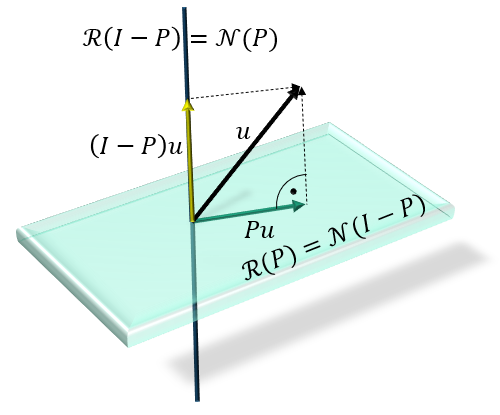  
</div>

## Izračunavanje matrica projekcije

**Primer 1.** Pretpostavimo da je $S$ potprostor dimenzije $k,$ $n-$dimenzionalnog prostora $V,$ gde je $k<<n.$ Neka je $v\in V$ vektor koji nije obavezno element potprostora $S.$
U vektorskim prostorima velikih dimenzija veoma često je korisno aproksimirati dati vektor pomoću vektora iz potprostora manje dimenzije. Drugim rečima, želimo da odredimo vektor $\widehat{v}\in S$ koji dobro aproksimira dati vektor $v.$ Jasno je da kada $v\in S,$ najbolja aproksimacija je sam vektor $v,$ pa ovakav problem nije interesantan. Zbog toga posmatramo slučaj kada $v\not\in S.$ Kvalitet aproksimacije merićemo indukovanom normom, tj. $\|v-\widehat{v}\|=\sqrt{(v-\widehat{v})\cdot(v-\widehat{v})}.$ Sada polazni problem aproksimacije možemo da formulišemo na sledeći način: 

Za dati vektor $v\not\in S$ odrediti vektor $\widehat{v}\in S$ za koji važi 
        $$\|v-\widehat{v}\|\leq\|v-u\|,\quad\forall u\in S.$$
    
    
Grešku aproksimacije $\|v-\widehat{v}\|$ zvaćemo greška odsecanja.

Pokazaćemo da je rešenje ovog problema ortogonalna projekcija vektora $v$ na potprostor $S.$ Uvedimo oznaku
$\widehat{v}=P_Sv.$ Znamo da je $v-\widehat{v}\perp S.$ Tada za proizvoljan vektor $u\in S$ imamo
\begin{align}
\|v-u\|^2&=(v-u)^T(v-u)=\big((v-\widehat{v})+(\widehat{v}-u)\big)^T\big((v-\widehat{v})+(\widehat{v}-u)\big)\\
&=(v-\widehat{v})^T(v-\widehat{v})+2(v-\widehat{v})^T\underbrace{(\widehat{v}-u)}_{\in S}+(\widehat{v}-u)^T(\widehat{v}-u)\\
&=\|v-\widehat{v}\|^2+\|\widehat{v}-u\|^2\geq\|v-\widehat{v}\|^2.
\end{align}

**Primer 2.** Neka je $S$ potprostor vektorskog prostora $V,$ i neka su $s\in S$ i $u\in V$ proizvoljni vektori.  
Kao što je pokazano u $(1),$ za vektor $u$ postoje jedinstveno određeni vektori $v\in S,\ w\in S^{\perp},\qquad v\perp w,$ za koje je $u=v+w.$ Vektor $v\in S$ je tada projekcija $u$ na $S,$ dok je $w$ projekcija $u$ na $S^{\perp},$ 
$$v={\rm Pr}_{S}\,u,\qquad w={\rm Pr}_{S^{\perp}}\,u.$$
Tada je 
$$u\cdot s=(v+w)\cdot s=v\cdot s+w\cdot s=v\cdot s+0=v\cdot s.$$
Dobijenu jednakost za skalarni proizvod možemo da zapišemo i u obliku
$$u\cdot s={\rm Pr}_{S}\,u\cdot s.$$

Interesantna posledica ovog zapisa glasi:
$$u\cdot {\rm Pr}_{S}\,u={\rm Pr}_{S}\,u\cdot{\rm Pr}_{S}\,u=\|{\rm Pr}_{S}\,u\|^2.$$

Zbog rezultata ovih analiziranih primera, u nastavku bavimo se postupcima za određivanje matrica projekcije na određeni potprostor.

### Projekcija na jednodimenzionalni potprostor

Neka je jednodimenzionalni potprostor $V$ prostora $\mathbb{R}^n$  određen vektorom pravca $p=\begin{bmatrix} p_1&p_2& \dots&p_n\end{bmatrix}^T,$
$$V=\mathcal{L}(p).$$
Ortogonalna projekcija $u=Pv$ proizvoljnog vektora $v\in\mathbb{R}^n$ na pravac $V$ dobija se iz dva uslova:
- vektor $u$ je kolinearan sa $p,$ tj. $u=\lambda p;$
- vektor $v-u$ je ortogonalan na $p.$

Na osnovu postavljenih uslova, nalazimo 
$$(v-\lambda p)^Tp=0\quad\Longleftrightarrow\quad v^Tp-\lambda p^Tp=0 \quad\Longleftrightarrow\quad 
\lambda=\dfrac{v^Tp}{p^Tp}\,.
$$
Odatle je projekcija $$u=\dfrac{v\cdot p}{p\cdot p}\,p=\dfrac{p^Tv}{p^Tp}\,p.$$
Zbog toga je 
$$
\|u\|=\dfrac{|p^Tv|}{\|p\|^2}\,\|p\|=
\dfrac{\|v\|\,\|p\|\,|\cos\angle(v,p)|}{\|p\|}=\|v\|\,|\cos\angle(v,p)|.
$$
Rastojanje tačke sa vektorom položaja $v$ od pravca određenog vektorom $p$ je dužina vektora $v-u.$ 

<div>
   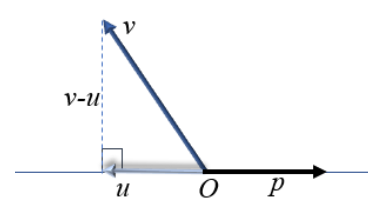  
</div>

Cilj nam je da odredimo projekcionu matricu $P$ kojom je moguće  izračunati ortogonalnu projekciju proizvoljnog vektora $v$ na pravac definisan sa $p.$ To znači da matrica $P$ zadovoljava uslove:
$$P^2=P\quad\mbox{i}\quad Pv=u=\dfrac{p^Tv}{p^Tp}\,p.$$
 Primetimo da je $u=\dfrac{p^Tv}{p^Tp}\,p=p\dfrac{p^Tv}{p^Tp},$ jer je $\dfrac{p^Tv}{p^Tp}$ skalar. Odatle je 
$$u=\dfrac{p\,p^T}{p^Tp}\,v\ \Longrightarrow\ P=\dfrac{p\,p^T}{p^Tp}\,.$$
Ukoliko sa $p_0=\dfrac{p}{\|p\|}$ označimo jedinični (normiran) vektor u pravcu vektora $p,$ tada je 
$$
P=\dfrac{p\,p^T}{p^Tp}=p_0p_0^T.
$$ 
Matricu $P$ zovemo elementarna projekcija na pravac određen jediničnim vektorom $p_0.$
Ova projekciona matrica je ranga 1 jer je projekcija na jednodimenzionalni potprostor $\mathcal{L}(p_0).$ Jezgro elementarne projekcije je potprostor ortogonalan na $\mathcal{L}(p_0)=\mathcal{L}(p).$
$$\mathcal{N}(P)=\mathcal{L}(p)^{\perp}.$$

**Primer 3.** Odredićemo matricu projekcije na pravac određen vektorom $p=\begin{bmatrix}1&2&2\end{bmatrix}^T.$

In [4]:
p=np.array([1,2,2])
P=np.outer(p,p)/np.dot(p,p)
P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

### Projekcija na proizvoljan potprostor

Neka je $Q\in\mathcal{M}_{m\times n}$ pravougaona matrica $(n\neq m)$ sa ortonormiranim kolonama, tj. važi $Q^TQ=I_n.$ Naravno, pod tim uslovima mora biti $m>n$ i ${\rm rang}(Q)=n.$ Tada je matrica $P=QQ^T$ ortogonalna projekcija. Tvrđenje je posledica narednih jednakosti.
\begin{align}
P^2&=(QQ^T)^2=(QQ^T)(QQ^T)=Q(Q^TQ)Q^T=QI_nQ^T=QQ^T=P,\\
P^T&=(QQ^T)^T=(Q^T)^TQ=QQ^T=P.
\end{align}
Primetimo da je izrazom $P=QQ^T$ data i faktorizacija punog ranga matrice $P.$ Zbog toga je $\mathcal{R}(P)=\mathcal{R}(Q),$ tj. kolone matrice $Q$ su ortonormirana baza prostora slika $\mathcal{R}(P).$

Ukoliko matricu $Q$ posmatramo kroz njene ortonormirane kolone, tj. ako uvedemo oznake kolona  
$$Q=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\q_1\\\phantom{i}\end{array}\!\!
&\,q_2\,&\dots&q_{n} \end{array}\right],$$ 
matrica projekcije $P=QQ^T$ može se predstaviti zbirom spoljašnjih proizvoda vektora $q_i:$
$$P=QQ^T=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\q_1\\\phantom{i}\end{array}\!\!
&\,q_2\,&\dots&q_{n} \end{array}\right]
\left[\begin{array}{ccc}
&q_1^T&\\[4pt]\hline&\,q_2\,&\\[4pt]\hline &\vdots&\\\hline &q_{n}& \end{array}\right] 
=q_1q_1^T+q_2q_2^T+\dots+q_nq_n^T.$$

S obzirom na ortonormiranost vektora $q_i,$ na osnovu prethodnog primera, matrica ortogonalne projekcije $P,$ na potprostor $\mathcal{R}(P)=\mathcal{R}(Q),$ je zbir elementarnih ortogonalnih projekcija $q_iq_i^T$ na ose određene ortonormiranom bazom prostora $\mathcal{R}(Q),$ 
$$P=P_1+P_2+\dots+P_n,\quad P_i=q_iq_i^T.$$
Dakle, zbir elementarnih ortogonalnih projekcija $P_i,$ na međusobno ortogonalne potprostore $\mathcal{L}(q_i),\ i=1,2,\dots,n,$ daje ortogonalnu projekciju $P=QQ^T$ na potprostor $\mathcal{L}(q_1,\dots,q_n).$ 
Za proizvoljan vektor $v\in\mathbb{R}^n$ važi
$$Pv=QQ^Tv\in\mathcal{L}(q_1,\dots,q_n),\quad
(I-P)v\in\mathcal{L}(q_1,\dots,q_n)^{\perp}.$$
Drugim rečima, kolone matrice $I-P$ su ortogonalne na kolone matrice $Q.$ 

Primetimo, ako je $\widehat{v}=Pv$ projekcija vektora $v$ na $\mathcal{L}(q_1,\dots,q_n),$ koordinate vektora $\widehat{v}$ u odnosu na bazu sastavljnu od vektora $q_1,\dots,q_n$ su Furijeove koordinate. 
\begin{align}
\widehat{v}&=\alpha_1q_1+\alpha_2q_2+\dots+\alpha_nq_n,\qquad \alpha_j=\widehat{v}\cdot q_j=v\cdot q_j=q_j^Tv,\\
\Longrightarrow&\quad \begin{bmatrix}\alpha_1\\\alpha_2\\\vdots\\\alpha_m\end{bmatrix}=Q^Tv,\qquad \widehat{v}=QQ^Tv.
\end{align}

**Zadatak 2.** Neka je matrica $A\in\mathcal{M}_{m\times n}$ ranga $r$ faktorisana $A=QR,$ tako da je $Q\in\mathcal{M}_{m\times r}$ matrica sa ortonormiranim kolonama i $R\in\mathcal{M}_{r\times n}$ gornje trougaona matrica ranga $r.$ Pokazati da je $P=I_m-QQ^T$ ortogonalna projekcija na potprostor $\mathcal{N}(A^T).$	

**Rešenje :**

S obzirom da je $QQ^T$ pokazano da je ortogonalna projekcija na $\mathcal{R}(Q)=\mathcal{R}(A)$, znamo da je tada i $P=I-QQ^T$ matrica ortogonalne projekcije na $\mathcal{R}(A)^{\perp}=\mathcal{N}(A^T).$

**Zadatak 3.**     Ukoliko ortogonalne projekcije $P_1$ i $P_2$ imaju međusobno ortogonalne prostore slika, tj.
$$\mathcal{R}(P_1)\perp\mathcal{R}(P_2)\ \Longleftrightarrow\ (P_1v)\cdot(P_2u)=0,\quad \forall\ v,u\in\mathbb{R}^n,
$$
tada je $P_1+P_2$ takođe ortogonalna projekcija. Dokazati.

**Rešenje :**

Neka su $P_1=Q_1Q_1^T$ i $P_2=Q_2Q_2^T,$ $Q_1\in\mathcal{M}_{n\times m_1},\ Q_2\in\mathcal{M}_{n\times m_2}$, dekompozicije punog ranga ortogonalnih projekcija $P_1$ i $P_2,$ sa orotonormiranim kolonama u matricama $Q_1$ i $Q_2.$ Zbog ortogonalnosti prostora slika $\mathcal{R}(P_1)\perp\mathcal{R}(P_2)\ \Longleftrightarrow\
\mathcal{R}(Q_1)\perp\mathcal{R}(Q_2),$ važi da je 
$$Q_1^TQ_2=O_{m_1\times m_2},\ Q_2^TQ_1=O_{m_2\times m_1}.$$ 
Tada je
\begin{align}
    (P_1+P_2)^T&=P_1^T+P_2^T=P_1+P_2,\\
    (P_1+P_2)^2&=P_1^2+P_1P_2+P_2P_1+P_2^2
    =P_1+Q_1\underbrace{Q_1^TQ_2}_O Q_2^T
    +Q_2\underbrace{Q_2^TQ_1}_O Q_1^T+P_2\\
    &=P_1+P_2.
\end{align}

**Primer 4.** Potražićemo matricu projekcije $P_A$ na prostor kolona matrice $A\in\mathcal{M}_{m\times n},$ ranga $n.$ Naglašavamo da uslov ranga ${\rm rang}(A)=n$ znači da su kolone matrice $A$ linearno nezavisne, tj. čine bazu prostora $\mathcal{R}(A).$ Uvedimo oznake vektora kolona matrice $A:$
$$A=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\a_1\\\phantom{i}\end{array}\!\!
&\,a_2\,&\dots&a_{n} \end{array}\right].$$

Matrica $P_A$ bi trebalo da proizvoljan vektor $v$ slika u vektor $u\in\mathcal{R}(A),$ tj. u vektor koji je linearna kombinacija kolona matrice $A,$ $u=\lambda_1a_1+\lambda_2a_2+\dots+\lambda_na_n,$
$$P_Av=u=A\Lambda,\qquad \Lambda=\begin{bmatrix}\lambda_1&\lambda_2&\dots&\lambda_n\end{bmatrix}^T.$$

Slika $u=P_Av$ je sa osobinom $v-u\perp\mathcal{R}(A),$ što zapisujemo $A^T(v-u)=\theta.$
$$
\Longleftrightarrow\quad A^T(v-A\Lambda)=\theta
\quad\Longleftrightarrow\quad  A^Tv=A^TA\Lambda
$$
Matrica $A$ je punog ranga kolona, pa je $A^TA$ regularna matrica i postoji njen inverz. Zbog toga je
$$\Lambda=(A^TA)^{-1}A^Tv\quad\Longrightarrow\quad u=A\Lambda=A(A^TA)^{-1}A^Tv\quad\Longrightarrow\quad 
P_A=A(A^TA)^{-1}A^T.$$

**Primer 5.** Izračunaćemo matricu projekcije na prostor kolona matrice $A=\begin{bmatrix}1&0\\1&1\\1&2\\1&-1\end{bmatrix}.$

In [5]:
A=np.array([[1,0],[1,1],[1,2],[1,-1]])
B=A.T@A
P=A@np.linalg.inv(B)@A.T
P

array([[ 0.3,  0.2,  0.1,  0.4],
       [ 0.2,  0.3,  0.4,  0.1],
       [ 0.1,  0.4,  0.7, -0.2],
       [ 0.4,  0.1, -0.2,  0.7]])

In [6]:
v=np.array([1,1,1,1])
P@v

array([1., 1., 1., 1.])

In [7]:
u=np.array([-1,-1,1,1])   #ortogonalan na kolone matrice A
P@u

array([0., 0., 0., 0.])